#### IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#### LOADING DATA

In [2]:
#Loading the dataset
df = pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### DATA PREPROCESSING

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df = df.dropna()
print('total number of data points is:' ,len(df))

total number of data points is: 2216


In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df['Dt_Customer'] =pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [9]:
print(df['Dt_Customer'].dtype)

datetime64[ns]


In [10]:
dates = []

for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

print('The newest customer data:', max(dates))
print('The oldest customer data:', min(dates))

The newest customer data: 2014-06-29
The oldest customer data: 2012-07-30


# Feature Engineering

In [11]:
days = []

d1 = max(dates)

for i in dates:
    d = d1 - i
    days.append(d)

df['Customer_For'] = days

In [12]:
df['Customer_For'] = df['Customer_For'].astype(str).str.extract("(\d+)").astype(int)

In [13]:
df['Age'] = 2025 - df['Year_Birth']

In [14]:
print(df.columns[-3:])

Index(['Response', 'Customer_For', 'Age'], dtype='object')


In [15]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,353.521209,56.179603
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,29.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,180.000000,48.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,355.500000,55.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,529.000000,66.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,699.000000,132.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,202.434667,11.985554


In [16]:
df.sort_values(by='Year_Birth').head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Age
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,3,11,0,43,132
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,1,0,0,0,3,11,0,276,126
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,1,3,11,0,276,125
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,0,0,0,0,0,3,11,0,356,85
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,0,1,0,0,0,3,11,0,442,84


<Axes: xlabel='Age', ylabel='Count'>

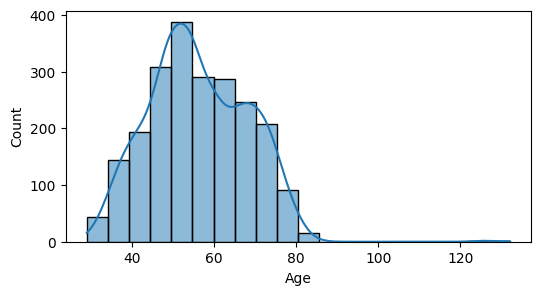

In [17]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Age'], bins=20, kde=True)

<Axes: ylabel='Age'>

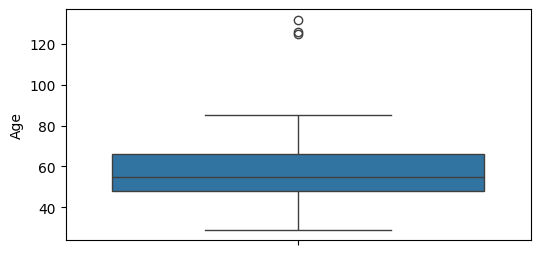

In [18]:
plt.figure(figsize=(6, 3))
sns.boxplot(df['Age'])

In [19]:
df_numerical_features = df.select_dtypes(include='number')

print(len(df_numerical_features.columns))

28


An error occurred while plotting 'Z_CostContact': The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
An error occurred while plotting 'Z_Revenue': The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principal component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.


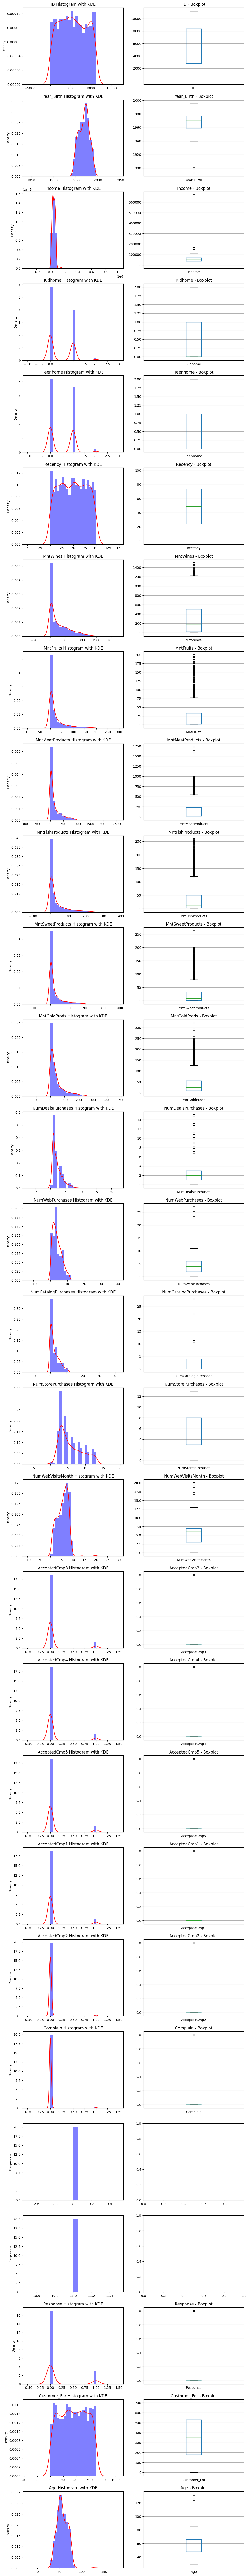

In [20]:
# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    try:
        df[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
        df[col].plot(kind='kde', ax=axes[i, 0], color='red')
        
        axes[i, 0].set_title(f'{col} Histogram with KDE')
        df.boxplot(column=col, ax=axes[i, 1])
        axes[i, 1].set_title(f'{col} - Boxplot')
        
    except IndexError:
      print(f"Error: Could not create plots for column '{col}'")
      break
    except Exception as e:
      print(f"An error occurred while plotting '{col}': {e}")
      continue

# Handling the outliers

In [21]:
# for i in df_numerical_features.columns:

#     #comput the 'IQR'
#     Q1= df_numerical_features[i].quantile(0.25)
#     Q3= df_numerical_features[i].quantile(0.75)
#     IQR = Q3 - Q1

#     #Define upper & lower bounds
#     lower_bounds= Q1 - 1.5 * IQR
#     upper_bounds= Q3 + 1.5 * IQR

#     # Replace 
#     df[i] = df_numerical_features[i].apply(lambda x: np.nan if x < lower_bounds else (np.nan if x > upper_bounds else x)) #NaN



In [22]:
df = df.rename(columns={'MntWines': 'Juice'})

In [23]:
df['Spent'] = df["Juice"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [24]:
print(df.columns[-3:])

Index(['Customer_For', 'Age', 'Spent'], dtype='object')


In [25]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [26]:
df['Living_With'] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [27]:
df['Children'] = df["Kidhome"] + df["Teenhome"]

In [28]:
df['Family_Size'] = df['Living_With'].replace({"Alone": 1, "Partner": 2}) + df['Children']

In [29]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [30]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [31]:
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Postgraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [32]:
df=df.rename(columns={"Juice": "Juice","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [33]:
columns_to_drop = ['Marital_Status', 'Dt_Customer', "Z_Revenue", "Year_Birth", "ID", "Z_CostContact"]

In [34]:
df = df.drop(columns_to_drop, axis= 1)

In [35]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Juice,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,353.521209,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,355.500000,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,132.000000,2525.000000,3.000000,5.000000,1.000000


In [36]:
df = df[(df["Age"] < 90 )]
df = df[(df["Income"] < 165000 )]

In [37]:
df['Living_With'].value_counts()

Living_With
Partner    1428
Alone       784
Name: count, dtype: int64

In [38]:
df['Education'] = df['Education'].replace({'Undergraduate': 0 , 'Graduate': 1, 'Postgraduate': 2})

In [39]:
df['Living_With'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2})

<Axes: >

<Figure size 600x300 with 0 Axes>

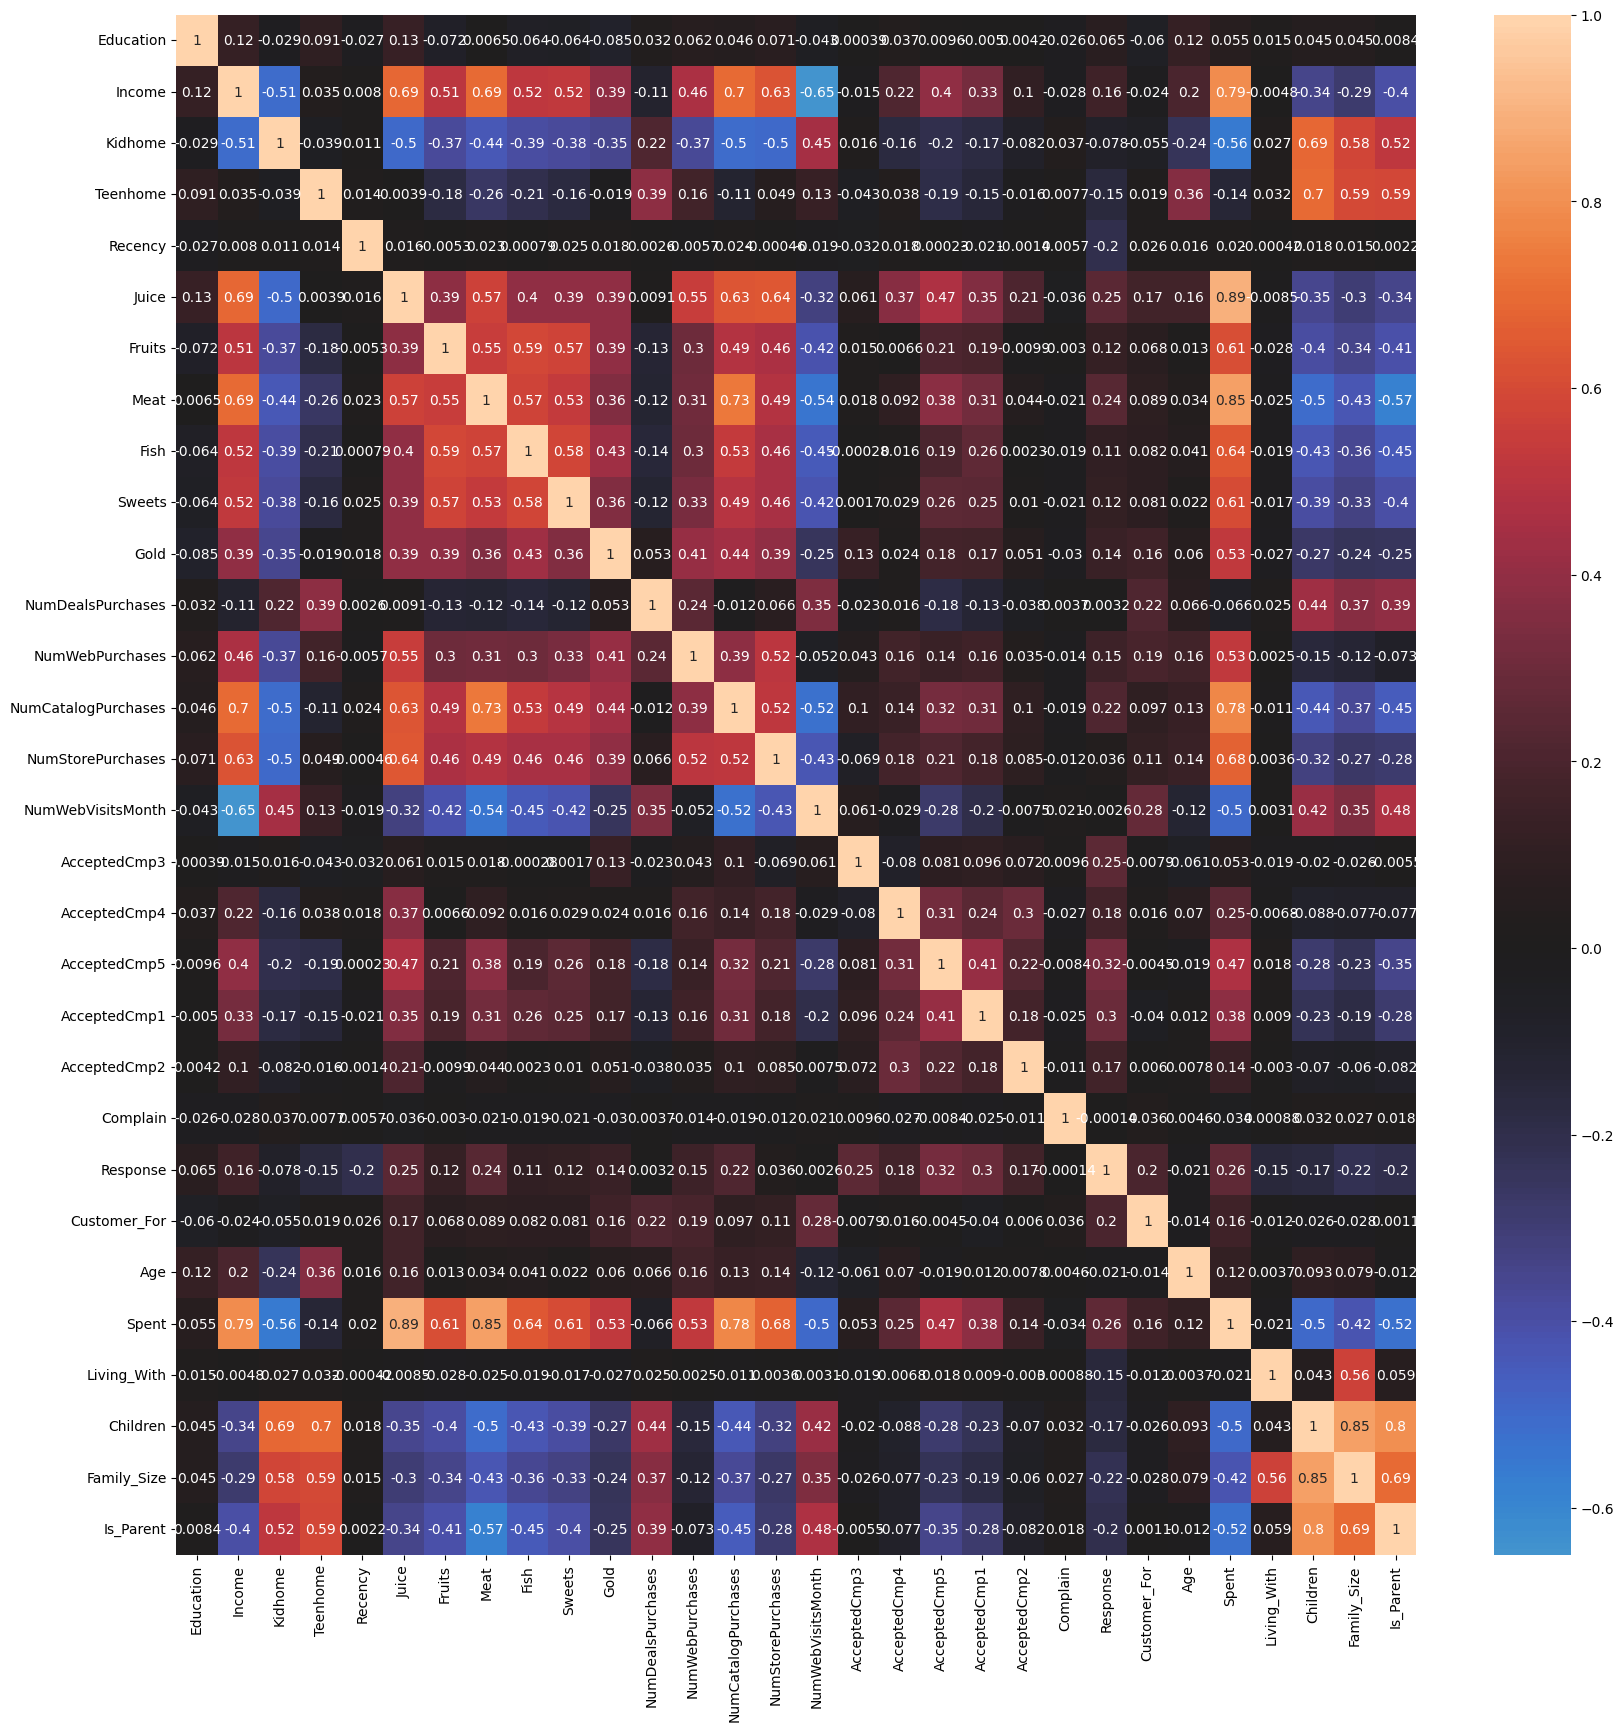

In [40]:
#correlation matrix

plt.figure(figsize=(6, 3))
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, center=0)

In [41]:
df_copy= df.copy()

In [42]:
columns_to_delete = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

In [43]:
df = df.drop(columns_to_delete, axis=1)

#### SCALING THE DATA ( STANDARDIZED)

In [44]:
# scaling the data using standerization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled ✅")
print(scaled_df)

All features are now scaled ✅
      Education    Income   Kidhome  Teenhome   Recency     Juice    Fruits  \
0     -0.821761  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1     -0.821761 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2     -0.821761  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3     -0.821761 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4      1.016192  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   
...         ...       ...       ...       ...       ...       ...       ...   
2207  -0.821761  0.430444 -0.822754  0.908097 -0.104347  1.197084  0.419540   
2208   1.016192  0.560123  2.902796  0.908097  0.241237  0.298631 -0.662628   
2209  -0.821761  0.233347 -0.822754 -0.929699  1.450778  1.787156  0.545373   
2210   1.016192  0.803172 -0.822754  0.908097 -1.417564  0.363866  0.092373   
2211   1.016192  0.042290  1.040021  0.908097 -0.311697 -0.656159 -0.587128   

          Meat      F

#### DIMENSIONALITY REDUCTION (PCA)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
PCA_df = pca.fit_transform(scaled_df)
PCA_df = pd.DataFrame(PCA_df, columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-5.139550e-17,2.877728,-5.958675,-2.540938,-0.771059,2.409800,7.477185
col2,2212.0,-4.497106e-17,1.712873,-4.303885,-1.320904,-0.154031,1.239488,6.272736
col3,2212.0,-2.890997e-17,1.246184,-3.757909,-0.835186,-0.032323,0.859060,6.536098


#### CLUSTERING

Elbow Method to determine the number of clusters to be formed:


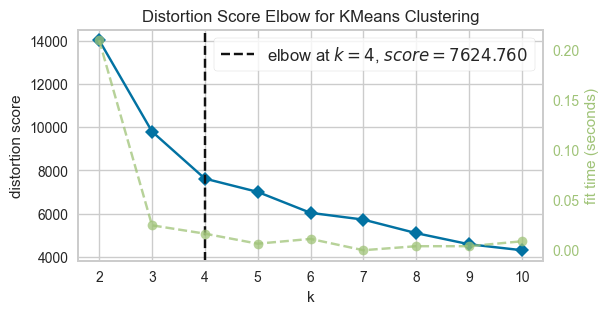

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
plt.figure(figsize=(6, 3))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

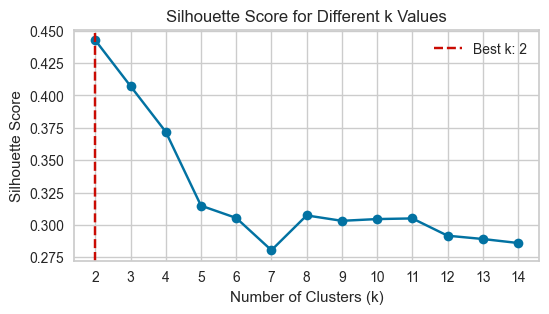

Best k: 2 with Silhouette Score: 0.4426


In [47]:
from sklearn.metrics import silhouette_score

score = {}  # Dictionary to store k values as keys and Silhouette Scores as values

for i in range(2, 15):  # Trying different values of k
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(PCA_df)  # Assign cluster labels
    sil_score = silhouette_score(PCA_df, clusters)
    
    score[i] = sil_score  # Store the score in the dictionary

# Plot the Silhouette Score for each k
plt.figure(figsize=(6, 3))
plt.plot(score.keys(), score.values(), marker='o', linestyle='-')

# Labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.xticks(range(2, 15))  # Ensure all k values are shown
plt.grid(True)

# Highlight the best k
best_k = max(score, key=score.get)
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k: {best_k}')
plt.legend()

# Show the plot
plt.show()

# Print the best k value
print(f'Best k: {best_k} with Silhouette Score: {score[best_k]:.4f}')


#### AGGLOMERATIVE CLUSTERING 

In [48]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)

PCA_df["Clusters"] = yhat_AC

# Add cluster labels to the DataFrame
df["Clusters"] = yhat_AC

#### EVALUATING MODELS

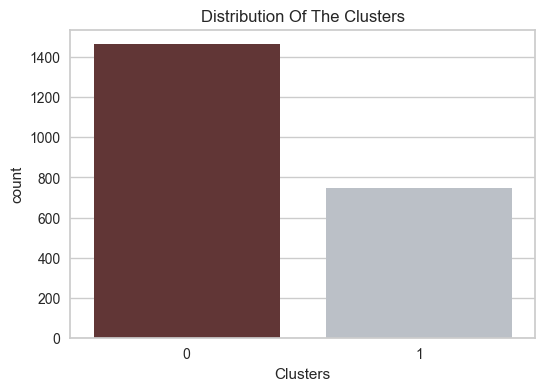

In [49]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
plt.figure(figsize=(6, 4))
pl = sns.countplot(x=PCA_df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

From the above plot, it can be clearly seen that cluster 0 is our biggest set of customers closely. We can explore what each cluster is spending on for the targeted marketing strategies

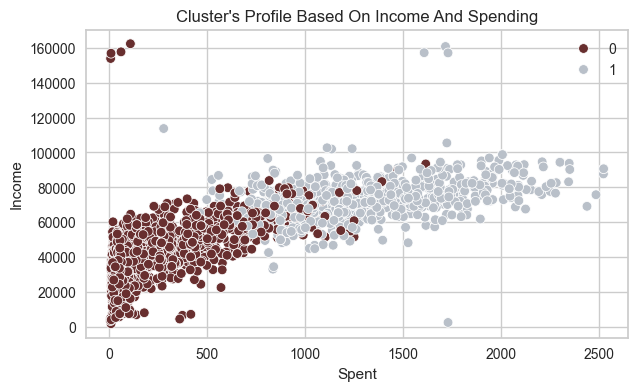

In [50]:
plt.figure(figsize=(7, 4))
pl = sns.scatterplot(data = df, x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

##### Above plot shows the clusters pattern between Income vs spending  

- group 0: Low spending & Low income
- group 1: high spending & high income

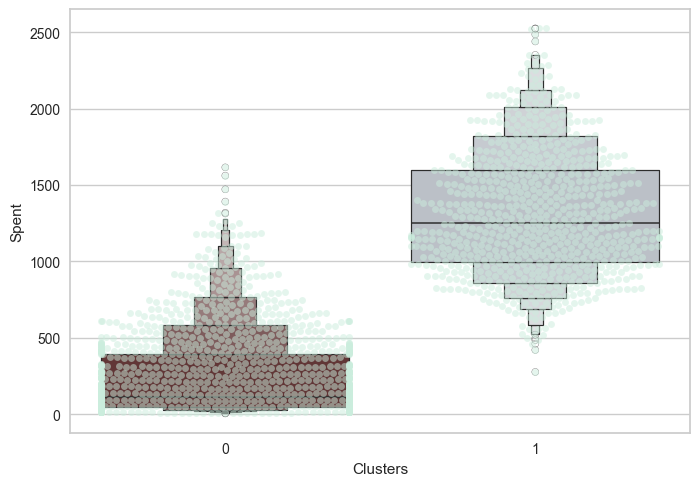

In [51]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

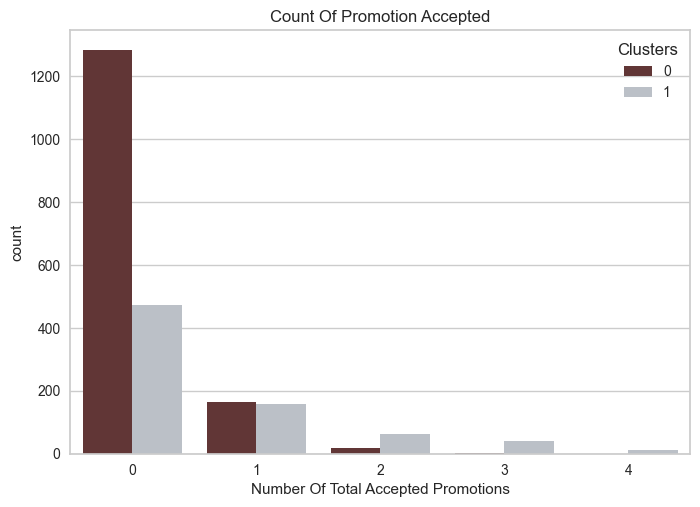

In [52]:
#Creating a feature to get a sum of accepted promotions 
df_copy["Total_Promos"] = df_copy["AcceptedCmp1"]+ df_copy["AcceptedCmp2"]+ df_copy["AcceptedCmp3"]+ df_copy["AcceptedCmp4"]+ df_copy["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df_copy["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

#### PROFILING

<Figure size 800x550 with 0 Axes>

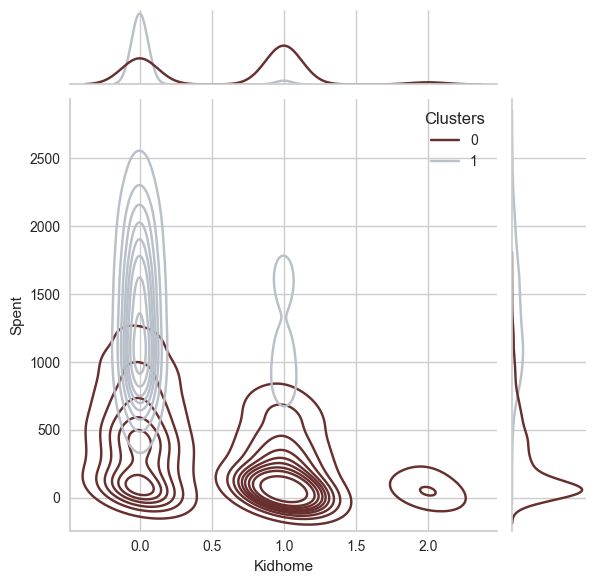

<Figure size 800x550 with 0 Axes>

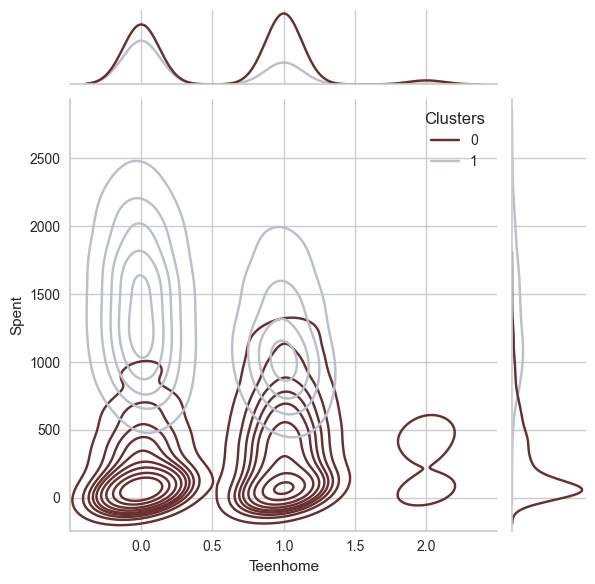

<Figure size 800x550 with 0 Axes>

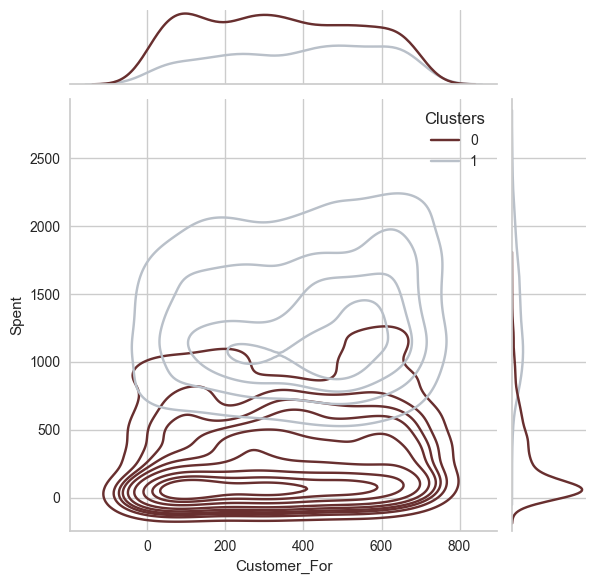

<Figure size 800x550 with 0 Axes>

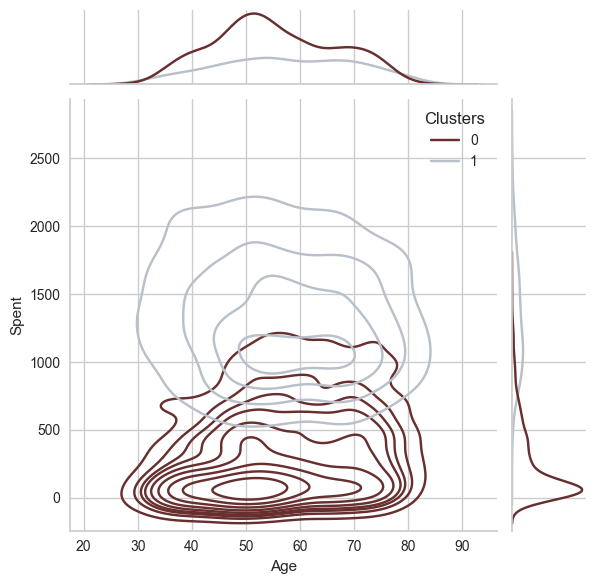

<Figure size 800x550 with 0 Axes>

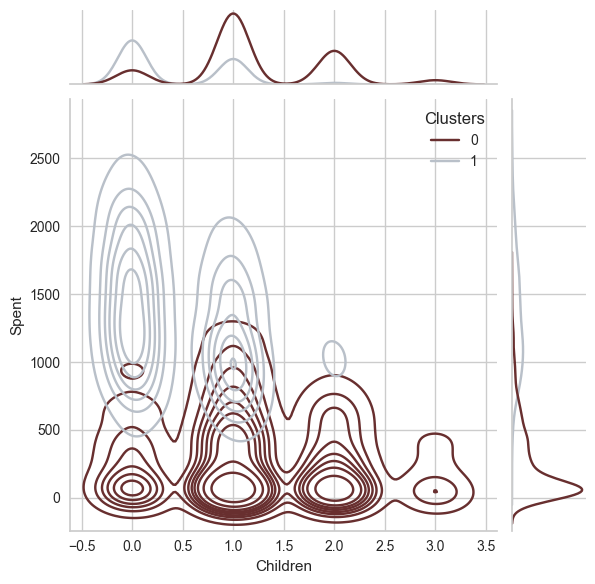

<Figure size 800x550 with 0 Axes>

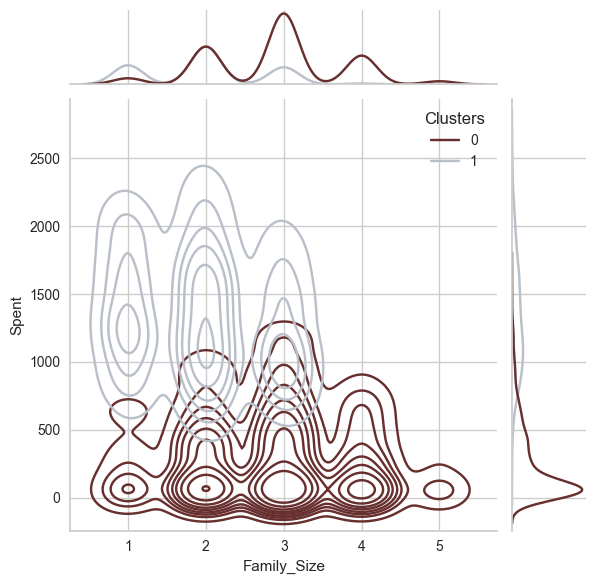

<Figure size 800x550 with 0 Axes>

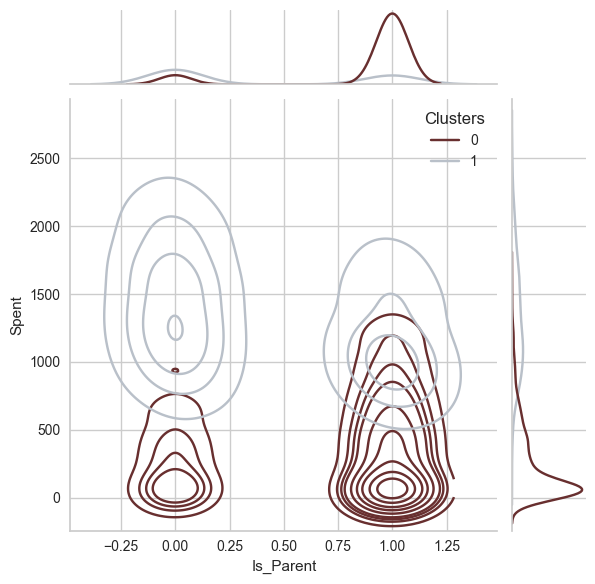

<Figure size 800x550 with 0 Axes>

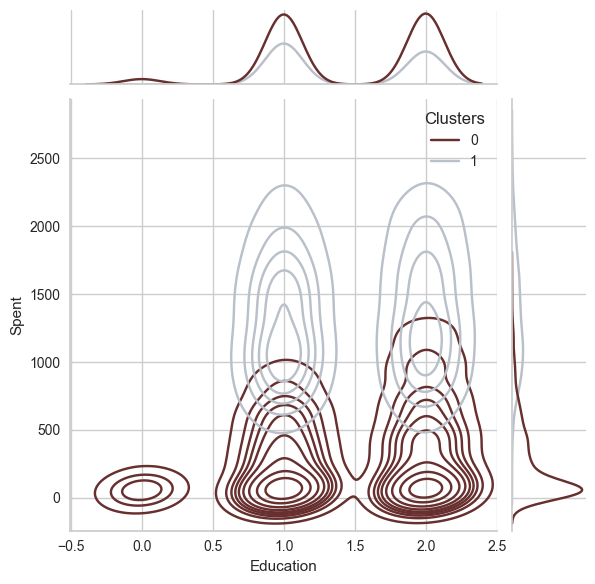

<Figure size 800x550 with 0 Axes>

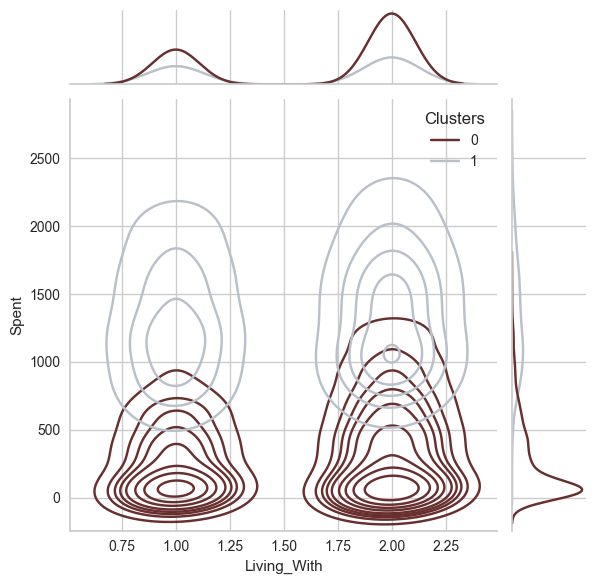

In [53]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()